In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import torch.utils.data as Data
%matplotlib inline

In [1]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 200
LR = 0.005  # learning rate
DOWNLOAD_MNIST = True
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld',
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),  # Converts a PIL.Image or numpy.ndarray to
    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,  # download it if you don't have it
)

test_data = datasets.MNIST(root='https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld',
                         train=False,
                         transform=torchvision.transforms.ToTensor(),
                         download=True)

# plot one example
print(train_data.train_data.size())  # (60000, 28, 28)
print(train_data.train_labels.size())  # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 3),  # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),  # compress to a range (0, 1)
        )

    def forward(self, x):
        features = self.encoder(x)
        reconstructed = self.decoder(features)
        return features, reconstructed


autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = (x.view(-1, 28 * 28))  # batch x, shape (batch, 28*28)
        b_y = (x.view(-1, 28 * 28))  # batch y, shape (batch, 28*28)
        b_label = (y)  # batch label

        features, reconstructed = autoencoder(b_x)

        loss = loss_func(reconstructed, b_y)  # mean square error
        optimizer.zero_grad()  # clear gradients for this training step
        loss.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        
    print('Epoch: ', epoch, ' train loss: %.4f' % loss.data)


# visualize in 3D plot
view_data = (train_data.train_data[:200].view(-1, 28 * 28).type(torch.FloatTensor) / 255.)
features_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)
X, Y, Z = features_data.data[:, 0].numpy(), features_data.data[:, 1].numpy(), features_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255 * s / 9))
    ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()

NameError: ignored

In [ ]:
# torch.manual_seed(1)    # reproducible

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),  # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid(),  # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = (train_data.train_data[:N_TEST_IMG].view(-1, 28 * 28).type(torch.FloatTensor) / 255.)

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = (x.view(-1, 28 * 28))  # batch x, shape (batch, 28*28)
        b_y = (x.view(-1, 28 * 28))  # batch y, shape (batch, 28*28)
        b_label = (y)  # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)  # mean square error
        optimizer.zero_grad()  # clear gradients for this training step
        loss.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        
    print('Epoch: ', epoch, '| train loss: %.4f' % loss.data)




/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Epoch:  0 | train loss: 0.1144
Epoch:  1 | train loss: 0.1128
Epoch:  2 | train loss: 0.1176
Epoch:  3 | train loss: 0.1194
Epoch:  4 | train loss: 0.1143
Epoch:  5 | train loss: 0.1166
Epoch:  6 | train loss: 0.1108
Epoch:  7 | train loss: 0.1169
Epoch:  8 | train loss: 0.1175
Epoch:  9 | train loss: 0.1143


In [ ]:
encoded_no_grad = encoded.detach()

In [ ]:
print(encoded_no_grad.size())

torch.Size([200, 128])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=LR)

train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

train_loss = []
for epoch in range(EPOCH):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        images = inputs.view(-1, 784)
        encoded, _ = autoencoder(images)
        encoded_no_grad = encoded.detach()
        outputs = net(encoded_no_grad)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    num_batches = 60000 // BATCH_SIZE    
    avg_loss = running_loss / num_batches
    print('[Epoch: %d] loss: %.3f' % (epoch + 1, avg_loss))
    train_loss.append(avg_loss)
    running_loss = 0.0

print('Finished Training')



[Epoch: 1] loss: 4.602
[Epoch: 2] loss: 2.240
[Epoch: 3] loss: 2.192
[Epoch: 4] loss: 2.356
[Epoch: 5] loss: 2.136
[Epoch: 6] loss: 2.049
[Epoch: 7] loss: 1.950
[Epoch: 8] loss: 1.918
[Epoch: 9] loss: 1.905
[Epoch: 10] loss: 1.908
Finished Training


In [ ]:
test_loader = Data.DataLoader(test_data, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=2)

dataiter = iter(test_loader)
images, labels = dataiter.next()

images = images.view(-1, 784)
# print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

encoded, _ = autoencoder(images)
outputs = net(encoded)
_, predicted = torch.max(outputs, 1)

# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.view(-1, 784)
        encoded, _ = autoencoder(images)
        outputs = net(encoded)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 31 %


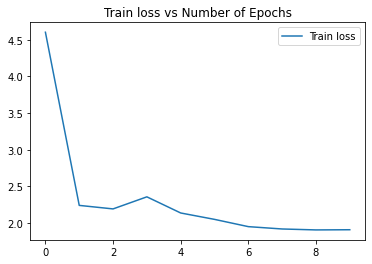

In [ ]:
plt.plot(train_loss, label='Train loss')
plt.title('Train loss vs Number of Epochs')
plt.legend()
plt.show()

In [ ]:
'''
Reference:
https://github.com/scofield7419/basic_NNs_in_frameworks/blob/master/pytorch/autoencoder/autoencoder.py